### 목표
- SimpleRNN과 LSTM을 이용해서 로이터 뉴스를 분류하는 모델을 만들어보자.
- 워드 임베딩을 사용해보자.

In [38]:
# 필요한 라이브러리 가져오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 로이터 뉴스 데이터 가져오기
from tensorflow.keras.datasets import reuters

In [39]:
# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = reuters.load_data()

In [40]:
X_train

array([list([1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 16784, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 19261, 49, 2295, 13415, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 13415, 30625, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4

In [41]:
# 현재 정답의 종류 : 46개
# 다중 분류!
# 다중 분류 시 정답 데이터를 원핫 인코딩 진행
# pd.get_dummies
# to_categorical
from tensorflow.keras.utils import to_categorical

In [42]:
# 원 핫 인코딩(정답 데이터 원핫 인코딩)
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

In [43]:
y_train_onehot.shape, y_test_onehot.shape
# 원핫 인코딩 이상 없음

((8982, 46), (2246, 46))

### 데이터 전처리
- 현재 데이터의 특징 : 뉴스 기사의 길이가 모두 다르다.
- 길이가 문제가 될 것 같다.(현재 데이터는 순환 횟수가 모두 다르다.) : 맞추기 힘듬
- 적절한 길이를 찾아서 그 길이로 데이터를 맞춰주자.
  - 길이가 긴 뉴스기사는 단어를 잘라서 축소
  - 길이가 짧은 뉴수기사는 0을 채워서 데이터 확장(padding)

### 뉴스기사 길이 확인하기
- 적절한 기사 길이를 찾아봅시다.

In [44]:
# train 데이터에 있는 문장의 길이를 모두 다 가져와보자
train_len = []
for i in X_train :
  train_len.append(len(i))

In [45]:
# train 데이터 단어 길이 개수
train_len

[87,
 56,
 139,
 224,
 101,
 116,
 100,
 100,
 82,
 106,
 31,
 59,
 65,
 316,
 527,
 76,
 114,
 17,
 91,
 77,
 231,
 108,
 83,
 29,
 95,
 110,
 23,
 373,
 114,
 354,
 133,
 222,
 571,
 155,
 83,
 208,
 170,
 269,
 74,
 19,
 23,
 78,
 21,
 377,
 104,
 299,
 89,
 56,
 94,
 139,
 118,
 36,
 137,
 107,
 83,
 66,
 70,
 112,
 88,
 51,
 83,
 123,
 17,
 185,
 84,
 52,
 102,
 73,
 106,
 486,
 107,
 82,
 263,
 172,
 491,
 190,
 143,
 62,
 26,
 88,
 114,
 38,
 85,
 112,
 793,
 104,
 25,
 21,
 101,
 28,
 25,
 81,
 135,
 73,
 62,
 18,
 90,
 266,
 91,
 64,
 409,
 92,
 319,
 166,
 85,
 200,
 152,
 474,
 60,
 58,
 584,
 71,
 273,
 51,
 255,
 28,
 171,
 143,
 91,
 46,
 110,
 77,
 162,
 24,
 52,
 175,
 61,
 95,
 97,
 259,
 112,
 73,
 94,
 17,
 650,
 23,
 88,
 309,
 105,
 89,
 41,
 314,
 54,
 374,
 67,
 160,
 75,
 207,
 373,
 84,
 87,
 74,
 98,
 136,
 256,
 95,
 50,
 108,
 52,
 100,
 233,
 86,
 68,
 47,
 73,
 158,
 113,
 23,
 100,
 80,
 202,
 104,
 122,
 101,
 95,
 118,
 253,
 192,
 80,
 183,
 29,
 604,


In [46]:
# 다른 코드(리스트 컴프리핸션)
# 리스트와 반복묵을 결합해서 사용하는 함수
train_len = [len(i) for i in X_train]
train_len

[87,
 56,
 139,
 224,
 101,
 116,
 100,
 100,
 82,
 106,
 31,
 59,
 65,
 316,
 527,
 76,
 114,
 17,
 91,
 77,
 231,
 108,
 83,
 29,
 95,
 110,
 23,
 373,
 114,
 354,
 133,
 222,
 571,
 155,
 83,
 208,
 170,
 269,
 74,
 19,
 23,
 78,
 21,
 377,
 104,
 299,
 89,
 56,
 94,
 139,
 118,
 36,
 137,
 107,
 83,
 66,
 70,
 112,
 88,
 51,
 83,
 123,
 17,
 185,
 84,
 52,
 102,
 73,
 106,
 486,
 107,
 82,
 263,
 172,
 491,
 190,
 143,
 62,
 26,
 88,
 114,
 38,
 85,
 112,
 793,
 104,
 25,
 21,
 101,
 28,
 25,
 81,
 135,
 73,
 62,
 18,
 90,
 266,
 91,
 64,
 409,
 92,
 319,
 166,
 85,
 200,
 152,
 474,
 60,
 58,
 584,
 71,
 273,
 51,
 255,
 28,
 171,
 143,
 91,
 46,
 110,
 77,
 162,
 24,
 52,
 175,
 61,
 95,
 97,
 259,
 112,
 73,
 94,
 17,
 650,
 23,
 88,
 309,
 105,
 89,
 41,
 314,
 54,
 374,
 67,
 160,
 75,
 207,
 373,
 84,
 87,
 74,
 98,
 136,
 256,
 95,
 50,
 108,
 52,
 100,
 233,
 86,
 68,
 47,
 73,
 158,
 113,
 23,
 100,
 80,
 202,
 104,
 122,
 101,
 95,
 118,
 253,
 192,
 80,
 183,
 29,
 604,


In [47]:
# 전체 데이터의 길이를 두고 각각의 값들을 파악해보자
print(f"최대값 : {max(train_len)}")
print(f"3사분위 : {np.quantile(train_len, 0.75)}") # 75퍼센트에 위치한 값
print(f"중앙값 : {np.median(train_len)}")
print(f"1사분위 : {np.quantile(train_len, 0.25)}") # 25퍼센트에 위치한 값
print(f"최소값 : {min(train_len)}")
print(f"평균값 :  {np.mean(train_len)}")

최대값 : 2376
3사분위 : 179.0
중앙값 : 95.0
1사분위 : 60.0
최소값 : 13
평균값 :  145.5398574927633


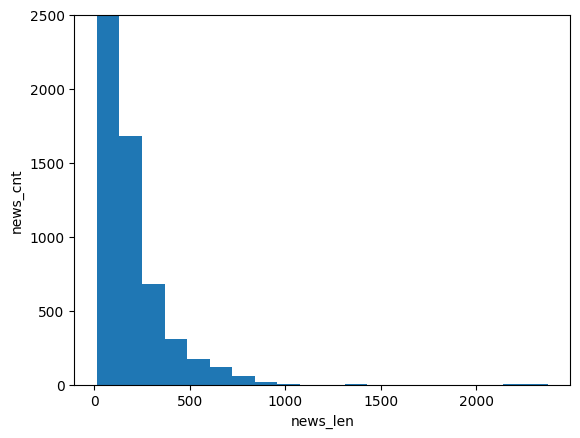

In [48]:
# 길이에 해당하는 뉴스기사 갯수 파악
# 데이터의 밀도(빈도수) -> 그래프(도수분포표)
# x축 : 뉴스 길이 구간별 표시
# y축 : 뉴스 기사의 빈도(갯수)
plt.hist(train_len, bins = 20)
plt.xlabel('news_len')
plt.ylabel('news_cnt')
plt.ylim(0, 2500)
plt.show()

- 히스토그램 분포상 100~200 사이의 문장 분포가 많은 것을 확인
- 중앙값 95 / 평균값 145 사이의 120 이라는 길이로 문장의 길이를 통일 시켜주자

In [49]:
# 문장의 길이를 통일하는 방법
# 길이가 긴 데이터는 120의 길이를 가지도록 잘라주자
# 길이가 짧은 데이터는 120의 길이를 가지도록 0으로 채줘주자
# 문제점 발견 train - 8982 / test - 2246
from tensorflow.keras.preprocessing import sequence

In [50]:
X_train_seq = sequence.pad_sequences(X_train, maxlen = 120)
X_test_seq = sequence.pad_sequences(X_test, maxlen = 120)

In [51]:
X_train_seq.shape, X_test_seq.shape

((8982, 120), (2246, 120))

In [52]:
X_train_seq[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     1, 27595, 28842,
           8,    43,    10,   447,     5,    25,   207,   270,     5,
        3095,   111,    16,   369,   186,    90,    67,     7,    89,
           5,    19,   102,     6,    19,   124,    15,    90,    67,
          84,    22,   482,    26,     7,    48,     4,    49,     8,
         864,    39,   209,   154,     6,   151,     6,    83,    11,
          15,    22,   155,    11,    15,     7,    48,     9,  4579,
        1005,   504,     6,   258,     6,   272,    11,    15,    22,
         134,    44,    11,    15,    16,     8,   197,  1245,    90,
          67,    52,    29,   209,    30,    32,   132,     6,   109,
          15,    17,    12], dtype=int32)

In [53]:
# 현재 X_trian의 차원 수는 2차원이다.
# 2차원의 구조(데이터의 수, timesteps)
# feature에 대한 차원이 없었다. -> 추가해주자(example, timestep, feature)
X_train_seq = X_train_seq.reshape(8982, 120, 1)
X_test_seq = X_test_seq.reshape(2246, 120, 1)

In [54]:
X_train_seq.shape, X_test_seq.shape

((8982, 120, 1), (2246, 120, 1))

### 모델링

In [55]:
# 재료 가져오기
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [56]:
# 단층 RNN 사용해보기
# 뼈대
model1 = Sequential()
# 입력층
model1.add(SimpleRNN(units = 128, input_shape = (120, 1), activation = 'tanh'))

# 중간층
model1.add(Dense(units = 64, activation = 'relu'))

# 출력층
model1.add(Dense(units = 46, activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [57]:
model1.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [58]:
h1 = model1.fit(X_train_seq, y_train_onehot, epochs = 20)

Epoch 1/20
279/281 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3198 - loss: 2.6805

KeyboardInterrupt: 

- 층이 얕아서 충분한 연산을 할 수 없다.
- 충분한 연산이 되지 않아 학습이 제대로 되지 않는다.

In [ ]:
# 층을 충분하게 쌓아서 연산이 되도록 만들어보자
# 뼈대
model2 = Sequential()

# 입력층
# return_sequences : 기본값은 Fasle / 다수 출력 또는 RNN층을 여러겹으로 쌓을 때 순차 구조를 이용할 수 잇도록 활성화
model2.add(SimpleRNN(units = 128, input_shape = (120, 1), activation = 'tanh', return_sequences = True))
model2.add(SimpleRNN(units = 128, activation = 'tanh', return_sequences = True))
model2.add(SimpleRNN(units = 128, activation = 'tanh'))

# 중간층
model2.add(Dense(units = 64, activation = 'relu'))

# 출력층
model2.add(Dense(units = 46, activation = 'softmax'))

In [ ]:
model2.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [ ]:
h2 = model2.fit(X_train_seq, y_train_onehot, epochs = 20)

- 순환 횟수가 만항서 이전에 학습되었던 기억이 많이 날아감
- 기억을 관리해주는 LSTM을 사용해보자

### LSTM(장단기 기억 메모리)

In [ ]:
# 재료 불러오기
from tensorflow.keras.layers import LSTM

# LSTM을 사용하는 이유
# 시퀀스(순차 데이터)의 길이가 길어질수록 순환량이 많아지고 학습량이 많아지는 RNN의 특성을 확인할 수 있다.
# 그래서 기억값이 감소하는 RNN의 단점을 보완해보자.
# LSTM은 기억값을 메모리 셀에 별도로 관리한다. -> 중요한 정보는 강조 / 불필요한 기억은 삭제를 해준다.

In [ ]:
# 층을 충분하게 쌓아서 연산이 되도록 만들어보자
# 뼈대
model3 = Sequential()

# 입력층
# return_sequences : 기본값은 Fasle / 다수 출력 또는 RNN층을 여러겹으로 쌓을 때 순차 구조를 이용할 수 잇도록 활성화
model3.add(LSTM(units = 128, input_shape = (120, 1), activation = 'tanh', return_sequences = True))
model3.add(LSTM(units = 128, activation = 'tanh', return_sequences = True))
model3.add(LSTM(units = 128, activation = 'tanh'))

# 중간층
model3.add(Dense(units = 64, activation = 'relu'))

# 출력층
model3.add(Dense(units = 46, activation = 'softmax'))

In [ ]:
model3.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [ ]:
model3.fit(X_train_seq, y_train_onehot, epochs = 20, batch_size = 128)

### 워드 임베딩 추가!

In [ ]:
# 원 핫 인코딩, 단어 빈도수로 수치화를 진행하면 컴퓨터가 자연어를 처리하기 어려워한다.
# 단어 사이의 관계를 밀집된 표현(실수 형태)을 만들어주는 작업 -> 워드 임베딩
# 임베딩 층 불러오기
from tensorflow.keras.layers import Embedding

In [59]:
# 층을 충분하게 쌓아서 연산이 되도록 만들어보자
# 뼈대
model4 = Sequential()

# 임베딩 레이어는 첫번째 층에 사용
# input_dim : 데이터 내에서 사용할 단어의 최대 갯수(몇개의 단어를 사용할건지)
# output_dim : 임베딩 층을 통과 시킨 후 다음 생성된 실수의 갯수(임베딩 진행 후 실수가 많이 나왔는데 몇개로 추릴건지)

# 입력층
model4.add(Embedding(input_dim = 120, output_dim = 50))
model4.add(LSTM(units = 128, input_shape = (120, 1), activation = 'tanh'))
# model4.add(LSTM(units = 128, activation = 'tanh', return_sequences = True))
# model4.add(LSTM(units = 128, activation = 'tanh'))

# 중간층
model4.add(Dense(units = 64, activation = 'relu'))

# 출력층
model4.add(Dense(units = 46, activation = 'softmax'))

In [60]:
model4.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [61]:
X_train = X_train_seq.reshape(8982, 120)
X_test = X_test_seq.reshape(2246, 120)

In [62]:
model4.fit(X_train, y_train_onehot, epochs = 20)

Epoch 1/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3198 - loss: 2.6609
Epoch 2/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4867 - loss: 2.0584
Epoch 3/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5157 - loss: 1.8961
Epoch 4/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5325 - loss: 1.8074
Epoch 5/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5564 - loss: 1.7323
Epoch 6/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5855 - loss: 1.6613
Epoch 7/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5924 - loss: 1.6019
Epoch 8/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6047 - loss: 1.5815
Epoch 9/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6253 - loss: 1.5161
Epoch 10/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6338 - loss: 1.4862
Epoch 11/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6585 - loss: 1.3908
Epoch 12/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/ste